<a href="https://colab.research.google.com/github/YiyoMb/extraccion-conocimiento-bd/blob/main/notebooks/01_analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Librerías importadas correctamente
✅ Dataset ya existe localmente
📊 Cargando dataset...
✅ Dataset cargado: 541,909 filas × 8 columnas

📋 1. INFORMACIÓN GENERAL DEL DATASET
📏 Dimensiones: (541909, 8)
💾 Memoria: 134.93 MB
📅 Rango de fechas: 2010-12-01 08:26:00 a 2011-12-09 12:50:00

📋 Columnas (8):
  • InvoiceNo: object
  • StockCode: object
  • Description: object
  • Quantity: int64
  • InvoiceDate: datetime64[ns]
  • UnitPrice: float64
  • CustomerID: float64
  • Country: object

🔍 2. ANÁLISIS DE VALORES FALTANTES
       Columna  Valores_Faltantes  Porcentaje
6   CustomerID             135080   24.926694
2  Description               1454    0.268311
1    StockCode                  0    0.000000
0    InvoiceNo                  0    0.000000
3     Quantity                  0    0.000000
4  InvoiceDate                  0    0.000000
5    UnitPrice                  0    0.000000
7      Country                  0    0.000000


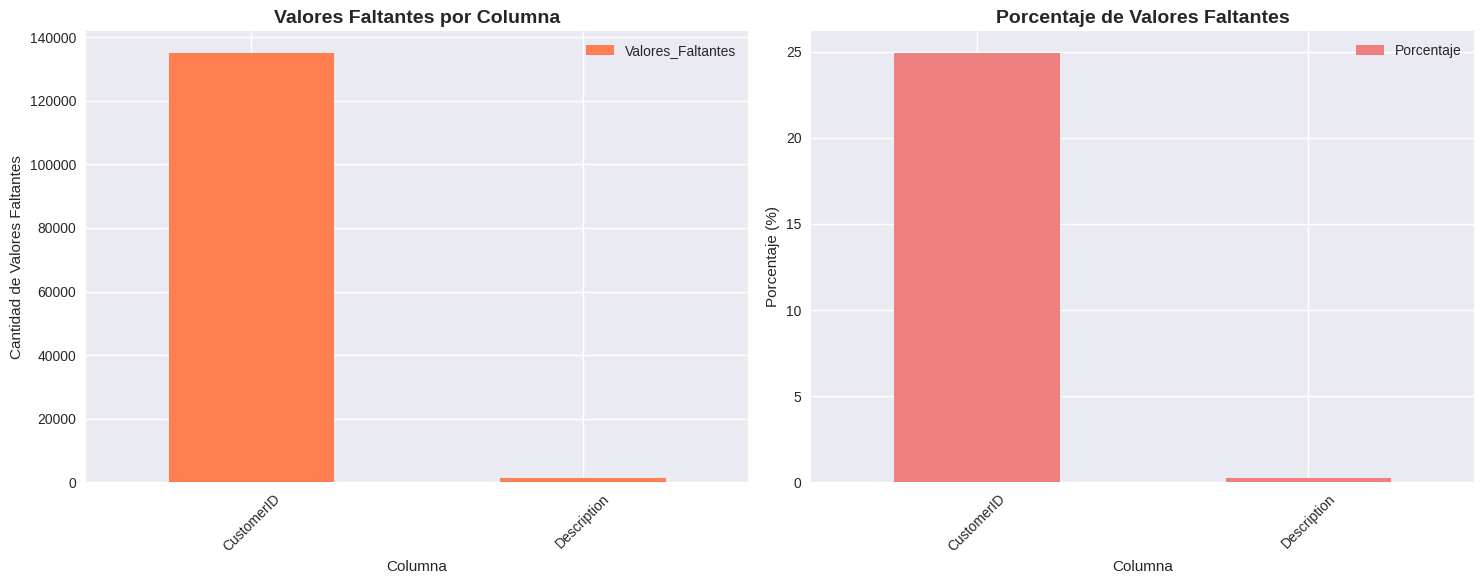


🔄 3. ANÁLISIS DE DUPLICADOS
🔢 Total de filas duplicadas: 5,268
📊 Porcentaje de duplicados: 0.97%
🧾 Duplicados por factura+producto+cliente: 10,684

📈 4. ESTADÍSTICAS DESCRIPTIVAS
Estadísticas de variables numéricas:
            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

✅ Columna 'TotalPrice' creada
📊 Estadísticas de TotalPrice:
count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64

⏰ 5. ANÁLISIS TEMPORAL
📅 Años en el dataset: [np.int32(2010), np.int32(2011)]
🗓️ Meses con datos: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.

In [2]:
# ==============================================================================
# ANÁLISIS EXPLORATORIO DE DATOS - ONLINE RETAIL DATASET
# Proyecto: Extracción de Conocimiento en Bases de Datos
# ==============================================================================

# Configuración inicial (reutilizar del main.ipynb)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Librerías importadas correctamente")

# ==============================================================================
# CARGA DEL DATASET
# ==============================================================================

# Descargar dataset si no existe (reutilizar código de main)
import urllib.request
import os

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
filename = "Online_Retail.xlsx"

if not os.path.exists('datos'):
    os.makedirs('datos')

if not os.path.exists(f'datos/{filename}'):
    print("📥 Descargando dataset...")
    urllib.request.urlretrieve(url, f'datos/{filename}')
    print("✅ Dataset descargado")
else:
    print("✅ Dataset ya existe localmente")

# Cargar dataset
print("📊 Cargando dataset...")
df = pd.read_excel(f'datos/{filename}')
print(f"✅ Dataset cargado: {df.shape[0]:,} filas × {df.shape[1]} columnas")

# ==============================================================================
# 1. EXPLORACIÓN INICIAL DEL DATASET
# ==============================================================================

print("\n" + "="*60)
print("📋 1. INFORMACIÓN GENERAL DEL DATASET")
print("="*60)

# Información básica
print(f"📏 Dimensiones: {df.shape}")
print(f"💾 Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"📅 Rango de fechas: {df['InvoiceDate'].min()} a {df['InvoiceDate'].max()}")

# Columnas y tipos de datos
print(f"\n📋 Columnas ({len(df.columns)}):")
for col in df.columns:
    print(f"  • {col}: {df[col].dtype}")

# ==============================================================================
# 2. ANÁLISIS DE VALORES FALTANTES
# ==============================================================================

print("\n" + "="*60)
print("🔍 2. ANÁLISIS DE VALORES FALTANTES")
print("="*60)

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_info = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Valores_Faltantes', ascending=False)

print(missing_info)

# Visualización de valores faltantes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
missing_info[missing_info['Valores_Faltantes'] > 0].plot(
    x='Columna', y='Valores_Faltantes', kind='bar', ax=ax1, color='coral'
)
ax1.set_title('Valores Faltantes por Columna', fontsize=14, fontweight='bold')
ax1.set_ylabel('Cantidad de Valores Faltantes')
ax1.tick_params(axis='x', rotation=45)

# Gráfico de porcentajes
missing_info[missing_info['Porcentaje'] > 0].plot(
    x='Columna', y='Porcentaje', kind='bar', ax=ax2, color='lightcoral'
)
ax2.set_title('Porcentaje de Valores Faltantes', fontsize=14, fontweight='bold')
ax2.set_ylabel('Porcentaje (%)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ==============================================================================
# 3. ANÁLISIS DE DUPLICADOS
# ==============================================================================

print("\n" + "="*60)
print("🔄 3. ANÁLISIS DE DUPLICADOS")
print("="*60)

duplicados_totales = df.duplicated().sum()
duplicados_porcentaje = (duplicados_totales / len(df)) * 100

print(f"🔢 Total de filas duplicadas: {duplicados_totales:,}")
print(f"📊 Porcentaje de duplicados: {duplicados_porcentaje:.2f}%")

# Analizar duplicados por columnas clave
duplicados_invoice = df.duplicated(subset=['InvoiceNo', 'StockCode', 'CustomerID']).sum()
print(f"🧾 Duplicados por factura+producto+cliente: {duplicados_invoice:,}")

# ==============================================================================
# 4. ANÁLISIS ESTADÍSTICO DESCRIPTIVO
# ==============================================================================

print("\n" + "="*60)
print("📈 4. ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)

# Estadísticas para variables numéricas
numeric_columns = ['Quantity', 'UnitPrice']
print("Estadísticas de variables numéricas:")
print(df[numeric_columns].describe())

# Crear nueva columna para análisis posterior
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print(f"\n✅ Columna 'TotalPrice' creada")
print(f"📊 Estadísticas de TotalPrice:")
print(df['TotalPrice'].describe())

# ==============================================================================
# 5. ANÁLISIS TEMPORAL
# ==============================================================================

print("\n" + "="*60)
print("⏰ 5. ANÁLISIS TEMPORAL")
print("="*60)

# Extraer componentes de fecha
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

print(f"📅 Años en el dataset: {sorted(df['Year'].unique())}")
print(f"🗓️ Meses con datos: {sorted(df['Month'].unique())}")

# Distribución temporal
temporal_summary = df.groupby(['Year', 'Month']).agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum',
    'CustomerID': 'nunique'
}).round(2)

print("\n📊 Resumen temporal (por año-mes):")
print(temporal_summary.head(10))

print("\n🎯 SIGUIENTES PASOS:")
print("  1. Análisis de distribuciones")
print("  2. Análisis de outliers")
print("  3. Análisis por países")
print("  4. Análisis de productos más vendidos")
print("  5. Patrones de comportamiento de clientes")

print("\n✅ Análisis exploratorio inicial completado")
print("📝 Próximo notebook: Análisis de distribuciones y outliers")